In [1]:
import pandas as pd

import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"

SAVE_FIG = False

In [2]:
data = pd.read_csv('results_paper.csv')

OPTIMAL_BASE = {'TOU': 1021.9, 'RTP': 1338.4, 'PC': 331.5}
CNAME_MAPPING = {'DPC': 'DPC', 'MPC': 'MPC', 'RLC': 'RLC', 'CPL': 'MPC-CL', 'MPC-C': 'MPC-C', 'RBC': 'RBC'}

In [3]:
def get_data(dr_type):

    data_specific = data[data.dr_type == dr_type]
    data_specific.sort_values(by=['cost'])

    plot_info = {}

    for controller_type in ['DPC', 'RLC', 'MPC', 'MPC-C', 'RBC', 'CPL']:
        tmp = data_specific[data_specific.controller_type == controller_type]
        tmp = tmp.sort_values(by=['look_ahead'])
        plot_info[controller_type] = [tmp.look_ahead.to_numpy(),
                                      (tmp.cost.to_numpy() - OPTIMAL_BASE[dr_type]) / OPTIMAL_BASE[dr_type] * 100]

    return plot_info

In [4]:
plot_info_all = {x: get_data(x) for x in ['TOU', 'RTP', 'PC']}

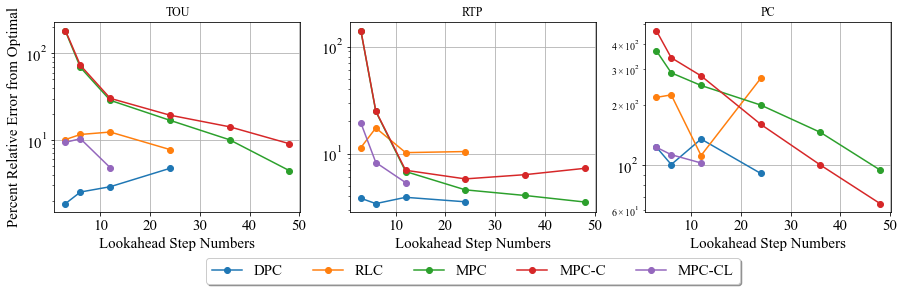

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3.5))

cnt = 0

for dr_type, plot_info in plot_info_all.items():

    for k, v in plot_info.items():
        if len(v[0]) < 2:
            continue
        c_name = CNAME_MAPPING[k]
        axes[cnt].plot(v[0], v[1], marker='o', label=c_name)
    axes[cnt].set_yscale('log')
#     axes[cnt].legend(fontsize=12)
    # plt.ylim([0, 30])
    axes[cnt].grid()
    axes[cnt].set_title(dr_type)

    axes[cnt].set_xlabel('Lookahead Step Numbers', fontsize=15)
#     plt.ylabel('Percent Relative Error from Optimal', fontsize=15)

    axes[cnt].tick_params(labelsize=15)
    cnt += 1
    
axes[0].set_ylabel('Percent Relative Error from Optimal', fontsize=15)
axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
               fancybox=True, shadow=True, ncol=5, fontsize=15)

if SAVE_FIG:
    plt.savefig('performance_vs_lookahead.png', dpi=200, bbox_inches = "tight")

In [6]:
plot_info

{'DPC': [array([ 3,  6, 12, 24]),
  array([123.3785822 , 101.05580694, 135.173454  ,  91.31221719])],
 'RLC': [array([ 3,  6, 12, 24]),
  array([217.28506787, 223.68024133, 112.0361991 , 270.19607843])],
 'MPC': [array([ 3,  6, 12, 24, 36, 48]),
  array([370.19607843, 287.60180995, 248.98944193, 199.15535445,
         145.85218703,  94.9321267 ])],
 'MPC-C': [array([ 3,  6, 12, 24, 36, 48]),
  array([465.3092006 , 341.62895928, 277.79788839, 159.84917044,
         100.4826546 ,  64.73604827])],
 'RBC': [array([0]), array([301.41779789])],
 'CPL': [array([ 3,  6, 12]),
  array([123.10708899, 113.06184012, 102.8959276 ])]}

[1.8494960367942046, 7.7698404931989415, 4.794989725022028, 4.442704765632643, 9.081123397592727, 19.023387807026126]
[3.40705319784817, 10.206216377764488, 5.3496712492528316, 3.5265989240884497, 5.797967722653908, 24.738493723849363]
[91.31221719457014, 112.03619909502262, 102.89592760180997, 94.9321266968326, 64.73604826546003, 301.41779788838613]


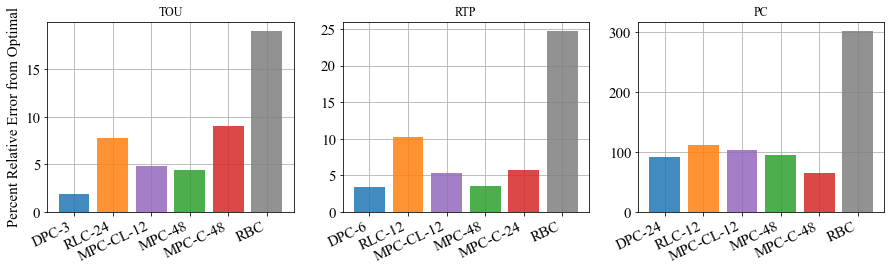

In [7]:
controller_types = ['DPC', 'RLC', 'CPL', 'MPC', 'MPC-C', 'RBC']

fig, axes = plt.subplots(1, 3, figsize=(15, 3.5))

cnt = 0

for dr_type, plot_info in plot_info_all.items():

    cost = []
    lookahead = []
    for controller_type in controller_types:
        _results = sorted(tuple(zip(plot_info[controller_type][0],
                                    plot_info[controller_type][1])),
                          key=lambda x: x[1])
        lookahead.append(_results[0][0])
        cost.append(_results[0][1])

    axes[cnt].bar(range(len(cost)), cost, alpha=0.85,
                  color=['tab:blue', 'tab:orange', 'tab:purple', 'tab:green', 'tab:red', 'tab:gray'])
    print(cost)
    
    c_names = []
    for idx, ct in enumerate(controller_types):
        ext = '-' + str(lookahead[idx]) if lookahead[idx] > 0 else''
        name = CNAME_MAPPING[ct] + ext
        c_names.append(name)
    axes[cnt].set_xticks(range(len(cost)), c_names, rotation=25, horizontalalignment='right')
    axes[cnt].set_axisbelow(True)
    axes[cnt].grid(zorder=0)
    axes[cnt].tick_params(labelsize=15)
    axes[cnt].set_title(dr_type)
    
    cnt += 1
    
axes[0].set_ylabel('Percent Relative Error from Optimal', fontsize=15)

if SAVE_FIG:
    plt.savefig('best_controller_compare.png', dpi=200, bbox_inches = "tight")
    